## Definitions

In [1]:
#matplotlib inline
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adadelta, Adam, SGD
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, Flatten, AveragePooling2D, Conv2DTranspose, UpSampling2D, BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)
#os.chdir("/content/gdrive/My Drive/Colab Notebooks") # might have to change path to point to your Colab Notebooks folder

## Load and format data

Number of classes: 10
Example of handwritten digit with correlated noise: 



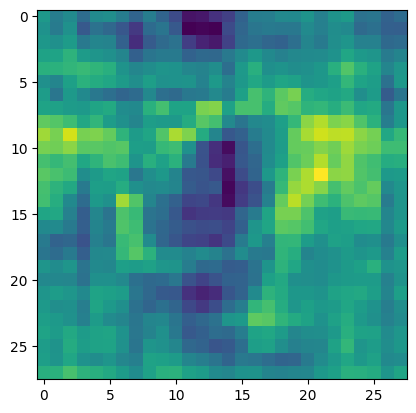

Class: 9

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)


In [2]:
data = np.load('./MNIST_CorrNoise.npz')

x_train = data['x_train']
y_train = data['y_train']

num_cls = len(np.unique(y_train))
print('Number of classes: ' + str(num_cls))

print('Example of handwritten digit with correlated noise: \n')

k = 3000
plt.imshow(np.squeeze(x_train[k,:,:]))
plt.show()
print('Class: '+str(y_train[k])+'\n')

# RESHAPE and standarize
x_train = np.expand_dims(x_train/255,axis=3)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_cls)

print('Shape of x_train: '+str(x_train.shape))
print('Shape of y_train: '+str(y_train.shape))

## Training

In [3]:
model_name='CNN_1' # To compare models, you can give them different names

pweight='./weights/weights_' + model_name  + '.keras'

if not os.path.exists('./weights'):
  os.mkdir('./weights')

## EXPLORE VALUES AND FIND A GOOD SET
b_size = 3 # batch size
val_split = 0.2 # percentage of samples used for validation (e.g. 0.5)
ep = 40 # number of epochs

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,562 (1.80 MB)

 Trainable params: 471,370 (1.80 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/40
15991/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1279 - loss: 2.3077
Epoch 1: val_loss improved from inf to 2.21076, saving model to ./weights/weights_CNN_1.keras
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.1280 - loss: 2.3076 - val_accuracy: 0.2197 - val_loss: 2.2108
Epoch 2/40
15989/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2506 - loss: 2.1753
Epoch 2: val_loss improved from 2.21076 to 2.05399, saving model to ./weights/weights_CNN_1.keras
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.2506 - loss: 2.1753 - val_accuracy: 0.2982 - val_loss: 2.0540
Epoch 3/40
15995/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3244 - loss: 2.0084
Epoch 3: val_loss improved from 2.05399 to 1.86868, saving model to ./weights/weights_CNN_1.keras
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.3245 - loss: 2.0083 - val_accuracy: 0.3728 - val_loss: 1.8687
Epoch 4/40
15988/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3853

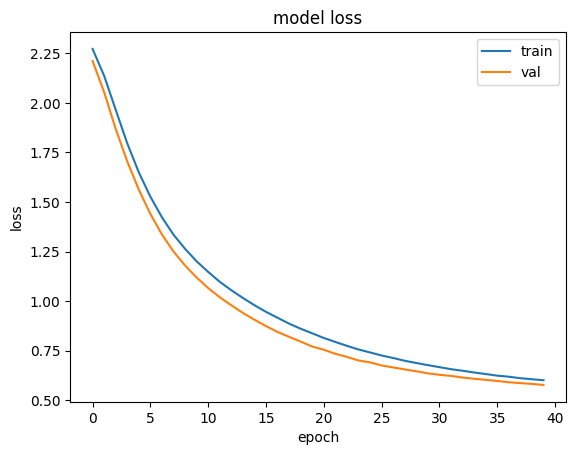

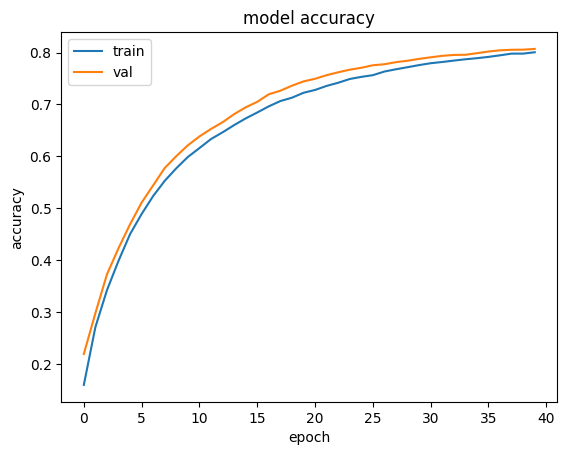

In [4]:
input_shape = x_train.shape[1:4] #(28,28,1)
model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_cls, activation='softmax'))

model.compile(loss = categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.summary()

checkpointer = ModelCheckpoint(filepath=pweight, verbose=1, save_best_only=True)
callbacks_list = [checkpointer] # explore adding other callbacks such as ReduceLROnPlateau, EarlyStopping

history=model.fit(x_train, y_train,
                        epochs=ep,
                        batch_size=b_size,
                        verbose=1,
                        shuffle=True,
                        validation_split = val_split,
                        callbacks=callbacks_list)

print('CNN_1 weights saved in ' + pweight)

# Plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Make predictions in test set

In [5]:
from keras.models import load_model

## LOAD DATA
data = np.load('./MNIST_CorrNoise.npz')

x_test = data['x_test']
y_test = data['y_test']

num_cls = len(np.unique(y_test))
print('Number of classes: ' + str(num_cls))

# RESHAPE and standarize
x_test = np.expand_dims(x_test/255,axis=3)

print('Shape of x_train: '+str(x_test.shape)+'\n')

## Define model parameters
model_name='CNN_1' # To compare models, you can give them different names
pweight='./weights/weights_' + model_name  + '.keras'

model = load_model(pweight)
y_pred = model.predict(x_test)
# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure y_test is also in class indices (not one-hot encoded)
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    y_test = np.argmax(y_test, axis=1)

Acc_pred = sum(y_pred_classes == y_test) / len(y_test)
#Acc_pred = sum(y_pred == y_test)/len(y_test)

print('Accuracy in test set is: '+str(Acc_pred))


Number of classes: 10
Shape of x_train: (10000, 28, 28, 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy in test set is: 0.8022
